<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [7.4 Simulation of an Exothermic CSTR](https://jckantor.github.io/cbe30338-2021/07.04-Simulation-of-an-Exothermic-CSTR.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.6 Path Planning for a Simple Car](https://jckantor.github.io/cbe30338-2021/07.06-Path-Planning-for-a-Simple-Car.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/../cbe30338-2021/docs/07.05-First-Order-System-in-Pyomo.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/07.05-First-Order-System-in-Pyomo.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 7.5 First Order System in Pyomo

## 7.5.1 First-Order Differential Equation with Initial Condition

The following cell implements a solution to a first-order linear model in the form

\begin{align}
\tau\frac{dy}{dt} + y & = K u(t) \\
\end{align}

where $\tau$ and $K$ are model parameters, and $u(t)$ is an external process input.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 101
  Number of variables: 101
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024537086486816406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Text(0.5,1,'Response of a linear first-order ODE')

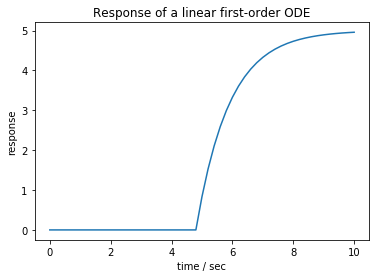

In [5]:
% matplotlib inline
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt

tf = 10
tau = 1
K = 5

# define u(t)
u = lambda t: 0 if t < 5 else 1

# create a model object
model = ConcreteModel()

# define the independent variable
model.t = ContinuousSet(bounds=(0, tf))

# define the dependent variables
model.y = Var(model.t)
model.dydt = DerivativeVar(model.y)

# fix the initial value of y
model.y[0].fix(0)

# define the differential equation as a constraint
model.ode = Constraint(model.t, 
    rule=lambda model, t: tau*model.dydt[t] + model.y[t] == K*u(t))

# transform dae model to discrete optimization problem
TransformationFactory('dae.finite_difference').apply_to(model, nfe=50, method='BACKWARD')

# solve the model
SolverFactory('ipopt').solve(model).write()

# access elements of a ContinuousSet object
t = [t for t in model.t]

# access elements of a Var object
y = [model.y[t]() for t in model.y]

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('response')
plt.title('Response of a linear first-order ODE')

<!--NAVIGATION-->
< [7.4 Simulation of an Exothermic CSTR](https://jckantor.github.io/cbe30338-2021/07.04-Simulation-of-an-Exothermic-CSTR.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.6 Path Planning for a Simple Car](https://jckantor.github.io/cbe30338-2021/07.06-Path-Planning-for-a-Simple-Car.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/../cbe30338-2021/docs/07.05-First-Order-System-in-Pyomo.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/07.05-First-Order-System-in-Pyomo.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>